<a href="https://colab.research.google.com/github/JoHyunjeong/Deep_learning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%A4%EC%8A%B5/1_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98%EA%B8%B0%EC%B4%88/Ch02_%E1%84%86%E1%85%A5%E1%86%AF%E1%84%90%E1%85%B5%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2_%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%86%E1%85%AE%E1%86%AF%E1%84%89%E1%85%A1%E1%84%8C%E1%85%B5%E1%86%AB%E1%84%8B%E1%85%A6%E1%84%89%E1%85%A5%E1%84%89%E1%85%A5%E1%86%BC%E1%84%87%E1%85%A7%E1%86%AF%E1%84%80%E1%85%AA%E1%84%91%E1%85%AD%E1%84%8C%E1%85%A5%E1%86%BC%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8%E1%84%92%E1%85%A1%E1%84%80%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 성별과 웃음 여부를 동시에 판단하는 모델을 만들어보자
--------------
## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    4. 전체 문제 구성은 좌측 첫 번째 아이콘을 통해 확인할 수 있습니다.

## 데이터 소개
    - 이번 주제의 데이터는 얼굴 데이터로 유명한 celeba dataset을 이용합니다.
  ![celeba dataset](https://storage.googleapis.com/tfds-data/visualization/fig/celeb_a-2.0.1.png)

     위의 이미지는 다음과 같은 것을 보여줍니다.  
    - 10,177 개의 신원 
    - 얼굴 이미지 수 202,599 개
    - 5 개의 랜드 마크 위치, 이미지 당 40 개의 바이너리 속성 주석
      - 성별
      - 큰 코
      - 매력적
      - 젊음
      - 웃음 여부
      - 모자 착용 여부
      - 안경 착용 여부
      - etc



- 데이터 출처:
 - [celeba dataset](https://www.tensorflow.org/datasets/catalog/celeb_a)
 - [celeba small](https://drive.google.com/file/d/1t2qIgpWdWX_n5OC8P2ZiDfPIQ98NY_PB/view?usp=sharing)

## 최종 목표

    - 작게 줄인 celeba 데이터를 이용하여 웃음, 성별 동시 구분
    - 한 모델에서 여러 결과에 대한 분석을 하는 방법
    - 큰 사진을 작게 줄이기

* 출제자 : 손근영 강사
---------------


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

## Step 1. 도입전 기본 처리

### 문제 1. tfds를 이용하여 데이터셋 사용하기

In [ ]:
# tfds를 이용하여 데이터셋 사용하기 # tfds : tensorflowdataset

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
tfds.list_builders() # hq는 고해상도

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

### 문제 2. celeba의 정보중 이용할 데이터만 추출

In [ ]:
# celeba의 정보중 이용할 데이터만 추출

In [ ]:
celeb_a = tfds.load('celeb_a') # 사용량 많으면 에러남

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

DownloadError: ignored

In [ ]:
import imageio # 이미지 출력을 쉽게 해줌
from skimage.transform import resize # 사이즈 바꾸기

# train dataset은 너무 커서 안쓰고 validation dataset을 train dataset으로, test dataset은 test dataset으로 사용

celeb_a_train, celeb_a_test = celeb_a['validation'], celeb_a['test'] 

train_images = []
train_labels = []

for tensor in tfds.as_numpy(celeb_a_train): # numpy로 바꿔서 저장
  isMale = tensor['attributes']['Male']
  isSmiling = tensor['attributes']['Smiling']

  label = np.array([isMale, isSmiling]).astype(np.int) # label 만들기

  img = resize(tensor['image'], (190//1.5, 89//1.5)) # 원본 shape = (218, 178, 3) -> (126.0, 59.0)으로 resize
  
  train_images.append(img)
  train_labels.append(label)

test_images = []
test_labels = []

for tensor in tfds.as_numpy(celeb_a_test):
  isMale = tensor['attributes']['Male']
  isSmiling = tensor['attributes']['Smiling']

  label = np.array([isMale, isSmiling]).astype(np.int) 

  img = resize(tensor['image'], (190//1.5, 89//1.5))

  test_images.append(img)
  test_labels.append(label)

In [ ]:
len(test_images), len(train_images)

### 문제 3. 데이터량 축소

In [ ]:
# 데이터량 축소

In [ ]:
from token import DEDENT
# 데이터가 불균형하면 학습이 어려움. 따라서 imbalance -> balance 되도록 분포를 맞춰서 데이터량을 축소

m_s = [] # man, smiling
f_s = [] # female, smiling
m_n = []
f_n = []

for a, b in zip(test_images, test_labels): # zip으로 돌리면 두 개가 한 쌍이 됨
  if b[0] and b[1]: # Male과 Smiling 모두 참인 경우
    m_s.append((a,b))
  elif not b[0] and b[1]: # Male이 거짓, Smiling이 참인 경우
    f_s.append((a,b))
  elif b[0] and not b[1]: # Male이 참, Smiling이 거짓인 경우
    m_n.append((a,b))
  elif not b[0] and not b[1]: # Male, Smiling 모두 거짓인 경우
    f_n.append((a,b))

In [ ]:
len(m_s), len(f_s), len(m_n), len(f_n)

In [ ]:
# 각 데이터를 550개씩으로 축소
total = m_s[:550], f_s[:550], m_n[:550], f_n[:550]
len(total) # 2200개

In [ ]:
# test를 trains, tests로 분할
import random

random.shuffle(total) # 무작위로 섞어주기
trains = total[:2000]
tests = total[2000:]
len(trains), len(tests) # 2000개, 200개

In [ ]:
trains[0] # image와 label이 같이 들어있음

In [ ]:
train_images, train_labels = list(zip(*trains)) # image와 label 분리
test_images, test_labels = list(zip(*tests))

train_images = np.array(train_images) # list -> np.array
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 저장
np.savez('/content/drive/MyDrive/패스트캠퍼스/Part 1/celeba_small.npz', train_images=train_images, train_labels=train_labels, test_images=test_images, test_labels=test_labels)

### 문제 4. 사전 저장된 celeba small 데이터 확인

In [ ]:
# 이미 저장된 celeba 데이터를 이용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 리눅스 코드를 통해 확인
!ls -al '/content/drive/My Drive/패스트캠퍼스/Part 1'

total 171561
-rw------- 1 root root 173961605 Feb 14 15:40  celeba_small.npz
drwx------ 2 root root      4096 Feb 15 07:21  .ipynb_checkpoints
-rw------- 1 root root    364345 Feb 14 15:26 '[실습]Part1_Ch01_이미지 분류 - RNN으로 손글씨 이미지 분류하기.ipynb'
-rw------- 1 root root    211657 Feb 14 12:40 'Part1_Ch01_이미지 분류 - RNN으로 손글씨 이미지 분류하기.ipynb'
-rw------- 1 root root    241152 Feb 15 10:57 '[실습]Part1_Ch02_멀티모델 분류 - 인물 사진에서 성별과 표정 분석하기.ipynb'
-rw------- 1 root root    491518 Feb 14 12:40 'Part1_Ch02_멀티모델 분류 - 인물 사진에서 성별과 표정 분석하기.ipynb'
-rw------- 1 root root     19063 Mar 26  2021 '[실습]Part1_Ch03_멀티레이블 분류 - 여러 의상 사진에서 옷 종류 구분하기.ipynb'
-rw------- 1 root root    383661 Feb 14 12:40 'Part1_Ch03_멀티레이블 분류 - 여러 의상 사진에서 옷 종류 구분하기.ipynb'


In [ ]:
# 다운로드 받아서 사용하는 방법
# https://drive.google.com/file/d/1t2qIgpWdWX_n5OC8P2ZiDfPIQ98NY_PB/view
!gdown --id 1t2qIgpWdWX_n5OC8P2ZiDfPIQ98NY_PB

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1t2qIgpWdWX_n5OC8P2ZiDfPIQ98NY_PB 



### 문제 5. celeba_small 데이터 살펴보기

In [ ]:
# 데이터를 train에서 사람 이미지 한장과 label 정보 한개를 불러오는 코드를 작성해주세요. (x, y로 변수 대입)

In [ ]:
celeba_small = np.load('/content/drive/MyDrive/패스트캠퍼스/Part 1/celeba_small.npz')
list(celeba_small.keys())

['train_images', 'train_labels', 'test_images', 'test_labels']

In [ ]:
x = celeba_small['train_images'][3]
y = celeba_small['train_labels'][3]

### 문제 6. x와 y의 shape을 출력해보세요.

In [ ]:
# 데이터의 크기를 shape 함수를 통해 출력해주세요.

In [ ]:
x.shape, y.shape # x shape : height, width, color

((72, 59, 3), (2,))

### 문제 7. x를 각각 plt를 통하여 출력하세요.

In [ ]:
# x를 plt를 이용하여 출력하는 코드를 작성해보세요

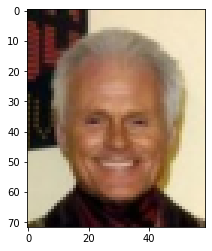

[1 1]


In [ ]:
plt.imshow(x)
plt.show()
print(y)

### 문제 8. celeba_small.npz 데이터에서 학습, 테스트 데이터를 로드하세요.

In [ ]:
# celeba_small.npz에서 train_images, test_images, train_labels, test_labels를 np array로 로드하세요.

In [ ]:
train_images = celeba_small['train_images']
train_labels = celeba_small['train_labels']

test_images = celeba_small['test_images']
test_labels = celeba_small['test_labels']

### 문제 9. train_images에서 0이 아닌 값들을 출력해보세요.

In [ ]:
# 하나의 이미지에 대한 모든 0이 아닌 값을 출력하는 코드를 작성하세요.

In [ ]:
train_images[train_images != 0][:10]

array([0.02352941, 0.04313725, 0.05490196, 0.01960784, 0.03921569,
       0.05490196, 0.01977401, 0.03921569, 0.05114656, 0.02352941])

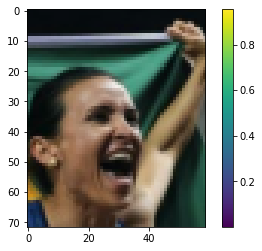

In [ ]:
plt.imshow(train_images[0])
plt.colorbar() # 컬러바를 통해 보기
plt.show()

### 문제 10. train_images의 dtype을 출력해보세요.

In [ ]:
# dtype을 이용하여 이미지의 np array type을 확인해보세요.

In [ ]:
train_images.dtype

dtype('float64')

## Step 2. 전처리

### 문제 11. 이미지 데이터의 범위 확인

In [ ]:
# train_images, train_labels의 shape과 dtype, 0이 아닌 숫자를 출력하는 코드를 작성하세요.

In [ ]:
print(train_images.shape, train_images.dtype)
print(train_images[train_images != 0][:10])

print(train_labels.shape, train_labels.dtype)
print(train_labels[train_labels != 0][:10])

(2000, 72, 59, 3) float64
[0.02352941 0.04313725 0.05490196 0.01960784 0.03921569 0.05490196
 0.01977401 0.03921569 0.05114656 0.02352941]
(2000, 2) int8
[1 1 1 1 1 1 1 1 1 1]


### 문제 12. images/labels 이미지 데이터의 최소/최대값을 출력

In [ ]:
# train/test 전체 데이터에서 각 images, labels의 min, max를 출력하는 코드를 작성하세요.

In [ ]:
print(train_images.min(), train_images.max())
print(train_labels.min(), train_labels.max()) 

print(test_images.min(), test_images.max())
print(test_labels.min(), test_labels.max()) 

0.0 1.0
0 1
0.0 1.0
0 1


### 문제 13. labels의 shape을 (배치, 2)에서 (배치, 2), (배치, 2)으로 변경하세요.  
(배치, (성별,웃음)) => (배치, 남자, 여자), (배치, 웃음, 안웃음)

In [ ]:
# (배치, 2)의 labels shape을 (배치, 1)의 shape의 2개의 array로 분리하는 코드를 추가하세요.

In [ ]:
train_labels.shape

(2000, 2)

In [ ]:
from keras.utils.np_utils import to_categorical

train_male_labels, train_smile_labels = np.split(train_labels, 2, axis=1) # 나누기
test_male_labels, test_smile_labels = np.split(test_labels, 2, axis=1)

print(train_labels[0], train_male_labels[0], train_smile_labels[0])
print(train_labels[1], train_male_labels[1], train_smile_labels[1])

[0 0] [0] [0]
[1 1] [1] [1]


In [ ]:
# (배치, 2) -> (배치, 1), (배치, 1) -> (배치, 2), (배치, 2)
train_male_labels = to_categorical(train_male_labels, 2)
train_smile_labels = to_categorical(train_smile_labels, 2)
test_male_labels = to_categorical(test_male_labels, 2)
test_smile_labels = to_categorical(test_smile_labels, 2)

In [ ]:
print(train_male_labels.shape, train_smile_labels.shape)
print(test_male_labels.shape, test_smile_labels.shape)

(2000, 2) (2000, 2)
(200, 2) (200, 2)


### 문제 14. labels의 shape을 (배치, 2), (배치, 2)에서 (배치, 4)로 합쳐보세요.

In [ ]:
# (배치, 2), (배치, 2)의 labels를 (배치, 4)로 합치는 코드를 작성하세요.
# (배치, 남성여부, 웃음여부) => (배치, 남성여부), (배치, 웃음여부) => (배치, 여자여부, 남자여부), (배치, 안웃음여부, 웃음여부) => (배치, 여자여부, 남자여부, 안웃음여부, 웃음여부)

In [ ]:
train_labels2 = np.concatenate([train_male_labels, train_smile_labels], axis=1)
test_labels2 = np.concatenate([test_male_labels, test_smile_labels], axis=1)

In [ ]:
train_labels2.shape, test_labels2.shape

((2000, 4), (200, 4))

## Step 3. 시각화 방법

### 문제 15. train_image의 이미지를 5장 획득하여 (5, 세로, 가로, 3)의 shape을 출력하세요.

In [ ]:
# (배치, 세로, 가로, 3)인 train_images에서 (5, 세로, 가로, 3)을 획득하는 코드를 작성하세요.

In [ ]:
train_images[:5].shape

(5, 72, 59, 3)

### 문제 16. 획득한 5장의 의미지를 (세로, 가로 * 5, 3)의 shape으로 변경해보세요.

In [ ]:
# np.hstack은 height 방향의 배열을 풀어서 width 방향으로 연결해줍니다.
# 해당 기능을 쓰면 (height, image_height, image_width, color)의 shape을 (image_height, image_width * height, color)으로 바꿔 줄 수 있습니다.
# 코드를 작성해보세요.

In [ ]:
np.hstack(train_images[:5]).shape

(72, 295, 3)

### 문제 17. np.hstack은 tensorflow에서 제공하는 방법이 아니므로 transpose 함수를 이용하여 (세로, 가로 * 5, 3)로 shape을 변경해보세요.

In [ ]:
# transpose는 tensor의 axis를 섞는 기능을 합니다.
# 해당 기능을 이용해서 (세로, 가로 * 5, 3)을 작성하는 코드를 작성해보세요.

In [ ]:
np.transpose(train_images[:5], (1,0,2,3)).reshape((72,-1,3)).shape

(72, 295, 3)

### 문제 18. (72, 295, 3)이 된 tensor를 plt로 출력해보세요.

In [ ]:
# (72, 295, 3)의 이미지를 plt로 출력해보세요.

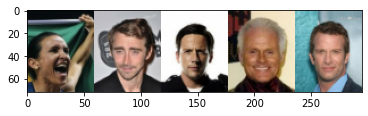

[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]]


In [ ]:
plt.imshow(np.transpose(train_images[:5], (1,0,2,3)).reshape((72,-1,3)))
plt.show()
print(train_labels2[:5])

### 문제 19. smile, male label도 5개 출력해보세요.

In [ ]:
# smile, male label을 5개 출력하는 코드를 작성해보세요.

In [ ]:
for male, smile in zip(train_male_labels[:5],train_smile_labels[:5]):
  print(male, smile)

[1. 0.] [1. 0.]
[0. 1.] [0. 1.]
[0. 1.] [1. 0.]
[0. 1.] [0. 1.]
[0. 1.] [0. 1.]


### 문제 20. smile, male이 각각 몇개 있는지 측정해보세요.

In [ ]:
# pandas를 smile, male이 각각 몇개 있는지 plt를 통하여 출력하는 코드를 작성하세요.

In [ ]:
df = pd.DataFrame(train_labels, columns=['gender','smile'])
df.groupby(['gender','smile']).size()

gender  smile
0       0        499
        1        507
1       0        504
        1        490
dtype: int64

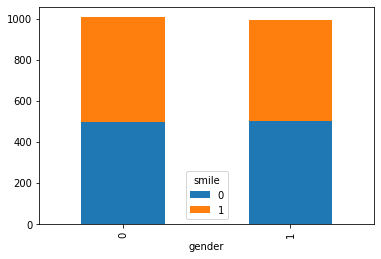

In [ ]:
df.groupby(['gender','smile']).size().unstack().plot(kind='bar', stacked=True)

## Step 4. 각각 모델링

### 문제 21. smile과 gender 학습셋을 각 각 처리하는 이미지 classification 모델 2개를 작성하세요. (단 label을 각각 따로 처리)

In [ ]:
# input (배치, 72, 59, 3), output (배치, 2)을 처리할 수 있는 모양의 모델 2개를 작성하세요. (gender 모델, smile 모델)

In [ ]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input, Flatten

def simple_model(): # gender, smile 둘다 같은 모델을 그대로 사용하므로 함수로 만들기
  # 레이어 생성
  inputs = Input((72,59,3))

  x = Conv2D(32, 3, 1, activation='relu')(inputs) # filter, kernel, stride
  x = MaxPool2D(2)(x) # 2배 작게
  x = Conv2D(64, 3, 1, activation='relu')(x)
  x = MaxPool2D(2)(x)
  x = Conv2D(64, 3, 1, activation='relu')(x)
  x = MaxPool2D(2)(x)

  x = Flatten()(x)
  x = Dense(64, activation='relu')(x)

  outputs = Dense(2, activation='softmax')(x) # 두 개 중 하나를 맞추는 문제

  # 모델 생성
  model = Model(inputs, outputs)
  return model

### 문제 22. 2개의 모델을 할당 받고 서머리를 출력해보세요.


In [ ]:
# simple_model() 모델을 2번 할당 받고 서머리를 출력하는 코드를 작성하세요.

In [ ]:
gender_model = simple_model()
smile_model = simple_model()

In [ ]:
print(gender_model.summary()) # padding 때문에 사이즈가 줄었음

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72, 59, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 70, 57, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 28, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 11, 64)        36928 

In [ ]:
print(smile_model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 72, 59, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 70, 57, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 35, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 33, 26, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 11, 64)        3692

### 문제 23. 만든 모델에 로스와 옵티마이저, 메트릭을 설정하세요.

In [ ]:
# 만든 모델에 loss는 categorical_crossentropy, optimizer는 adam 매트릭은 accuracy으로 설정하는 코드를 작성하세요.

In [ ]:
gender_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
smile_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 문제 24. 만든 모델에 train_images를 학습시켜 보세요.

In [ ]:
# train_images 학습시키고 15 epochs을 돌리고 그 진행 사항을 hist에 저장하는 코드를 작성하세요.

In [ ]:
# 학습 전 gender 모델의 weights
gender_model.get_weights()[0][0][0][0]

array([-7.61541873e-02, -1.05097562e-01,  2.69652307e-02,  8.73102248e-02,
       -1.46240219e-02,  1.37946919e-01, -2.05324888e-02, -1.01127222e-01,
       -1.09299153e-01,  6.78972900e-03, -8.71432051e-02, -1.22904405e-01,
        1.26336232e-01, -8.32764506e-02,  1.34055570e-01, -8.25124681e-02,
       -1.37736246e-01, -2.38354132e-02, -3.71476486e-02,  8.89696479e-02,
       -5.00530005e-05,  1.25352889e-02,  5.21456301e-02, -1.13621831e-01,
       -3.32056731e-02, -1.18538581e-01, -3.19957584e-02,  1.15217119e-02,
       -4.70747054e-03, -8.08913410e-02,  7.73203969e-02, -1.94732770e-02],
      dtype=float32)

In [ ]:
# 학습 전 smile 모델의 weights
smile_model.get_weights()[0][0][0][0]

array([-0.08359583,  0.03454392,  0.03191109, -0.12676431,  0.07094495,
        0.10980141, -0.00449534, -0.12756827,  0.11441778, -0.08119871,
       -0.106428  ,  0.10138565, -0.02368507,  0.04865311, -0.0676467 ,
        0.03609358, -0.06349088, -0.0426605 ,  0.05541112, -0.03741332,
       -0.04226808, -0.12790667, -0.06536688, -0.0804979 , -0.08721855,
        0.127501  ,  0.13293557, -0.03675009, -0.12194772, -0.07803161,
        0.02029634,  0.10830063], dtype=float32)

In [ ]:
gender_hist = gender_model.fit(train_images, train_male_labels, validation_data=(test_images, test_male_labels), epochs=15, verbose=1)

Epoch 1/15
63/63 [==============================] - 3s 21ms/step - loss: 0.5842 - accuracy: 0.6925 - val_loss: 0.5693 - val_accuracy: 0.7400
Epoch 2/15
63/63 [==============================] - 1s 13ms/step - loss: 0.4330 - accuracy: 0.8115 - val_loss: 0.4757 - val_accuracy: 0.7750
Epoch 3/15
63/63 [==============================] - 1s 13ms/step - loss: 0.2704 - accuracy: 0.8890 - val_loss: 0.3421 - val_accuracy: 0.8900
Epoch 4/15
63/63 [==============================] - 1s 13ms/step - loss: 0.1968 - accuracy: 0.9185 - val_loss: 0.2507 - val_accuracy: 0.9250
Epoch 5/15
63/63 [==============================] - 1s 13ms/step - loss: 0.1406 - accuracy: 0.9415 - val_loss: 0.2171 - val_accuracy: 0.9300
Epoch 6/15
63/63 [==============================] - 1s 13ms/step - loss: 0.0988 - accuracy: 0.9615 - val_loss: 0.1965 - val_accuracy: 0.9200
Epoch 7/15
63/63 [==============================] - 1s 12ms/step - loss: 0.0787 - accuracy: 0.9720 - val_loss: 0.2090 - val_accuracy: 0.9300
Epoch 8/15
63

In [ ]:
smile_hist = smile_model.fit(train_images, train_smile_labels, validation_data=(test_images, test_smile_labels), epochs=15, verbose=1)

Epoch 1/15
63/63 [==============================] - 2s 18ms/step - loss: 0.6947 - accuracy: 0.5270 - val_loss: 0.6852 - val_accuracy: 0.5350
Epoch 2/15
63/63 [==============================] - 1s 14ms/step - loss: 0.6609 - accuracy: 0.6065 - val_loss: 0.6134 - val_accuracy: 0.6950
Epoch 3/15
63/63 [==============================] - 1s 13ms/step - loss: 0.5225 - accuracy: 0.7445 - val_loss: 0.4274 - val_accuracy: 0.8150
Epoch 4/15
63/63 [==============================] - 1s 12ms/step - loss: 0.3733 - accuracy: 0.8385 - val_loss: 0.3132 - val_accuracy: 0.8850
Epoch 5/15
63/63 [==============================] - 1s 13ms/step - loss: 0.2958 - accuracy: 0.8720 - val_loss: 0.2701 - val_accuracy: 0.8950
Epoch 6/15
63/63 [==============================] - 1s 13ms/step - loss: 0.2586 - accuracy: 0.8865 - val_loss: 0.2336 - val_accuracy: 0.8950
Epoch 7/15
63/63 [==============================] - 1s 13ms/step - loss: 0.2200 - accuracy: 0.9095 - val_loss: 0.2594 - val_accuracy: 0.8850
Epoch 8/15
63

In [ ]:
# 학습 후 gender 모델의 weights
gender_model.get_weights()[0][0][0][0]

array([-0.10675938, -0.12709777, -0.00038103,  0.09969935, -0.03034081,
        0.16513985,  0.01547536, -0.14305307, -0.23217082,  0.04856693,
       -0.0953981 , -0.1369514 ,  0.07667679, -0.13964052,  0.10515979,
       -0.13250749, -0.13582173, -0.01533079, -0.07673589,  0.15216896,
        0.01583387,  0.01440236,  0.07457203, -0.05533534, -0.05336501,
       -0.16881827,  0.00526018,  0.02817575,  0.01246897, -0.01961101,
        0.19063778,  0.01597786], dtype=float32)

In [ ]:
# 학습 후 smile 모델의 weights
smile_model.get_weights()[0][0][0][0]

array([-0.14666158,  0.03977313,  0.07401393, -0.1655989 ,  0.13158801,
        0.13765687, -0.03922817, -0.16230242,  0.09982673, -0.10003189,
       -0.10180923,  0.12031964,  0.01994949,  0.0223778 , -0.06592489,
        0.02932189, -0.06686773, -0.07375249, -0.0009822 , -0.04790062,
       -0.11570406, -0.10990095, -0.01131858, -0.08660504, -0.14200282,
        0.16736709,  0.16170198, -0.06922332, -0.17758583, -0.12653182,
        0.01783561,  0.11766284], dtype=float32)

### 문제 25. 학습 진행 사항을 plt으로 출력하세요.

In [ ]:
# hist의 accuracy plt의 plot을 이용하여 출력하는 코드를 작성하세요.

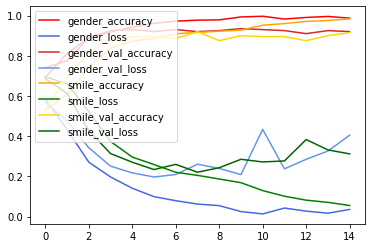

In [ ]:
plt.plot(gender_hist.history['accuracy'], label='gender_accuracy', color='red')
plt.plot(gender_hist.history['loss'], label='gender_loss', color='royalblue')
plt.plot(gender_hist.history['val_accuracy'], label='gender_val_accuracy', color='C3')
plt.plot(gender_hist.history['val_loss'], label='gender_val_loss', color='cornflowerblue')

plt.plot(smile_hist.history['accuracy'], label='smile_accuracy', color='orange')
plt.plot(smile_hist.history['loss'], label='smile_loss', color='green')
plt.plot(smile_hist.history['val_accuracy'], label='smile_val_accuracy', color='gold')
plt.plot(smile_hist.history['val_loss'], label='smile_val_loss', color='darkgreen')

plt.legend(loc='upper left')
plt.show()

## Step 5. 결과 확인

### 문제 26. 완성된 모델에서 test_image를 1장 넣고 결과를 res 변수에 저정하세요.

In [ ]:
# 모델에 test_images 중 1장을 넣고 결과를 받는 코드를 작성하세요.

In [ ]:
gender_res = gender_model.predict(np.array([test_images[1]]))
smile_res = smile_model.predict(np.array([test_images[1]]))

### 문제 27. res와 test_images[1]을 plt로 출력하세요

In [ ]:
# res와 test_images[1]을 print와 plt로 출력하는 코드를 작성하세요.

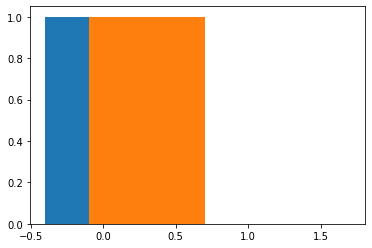

[[9.9999309e-01 6.9091498e-06]]


In [ ]:
plt.bar(range(2), gender_res[0]) # gender_res[0]은 배치 축 없애줌
plt.bar(np.array(range(2))+0.3, test_male_labels[1])
plt.show()

print(gender_res)

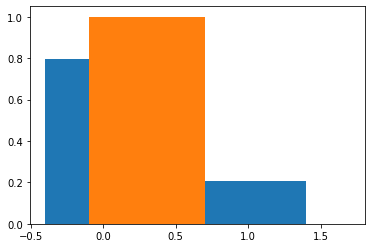

[[0.79374164 0.20625836]]


In [ ]:
plt.bar(range(2), smile_res[0]) # gender_res[0]은 배치 축 없애줌
plt.bar(np.array(range(2))+0.3, test_smile_labels[1])
plt.show()

print(smile_res)

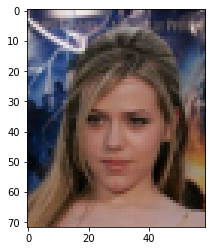

0 0
[0 0]


In [ ]:
gender_res = gender_model.predict(np.array([test_images[1]])).argmax()
smile_res = smile_model.predict(np.array([test_images[1]])).argmax()

plt.imshow(test_images[1])
plt.show()

print(gender_res, smile_res)
print(test_labels[1])

## Step 6. 멀티 아웃풋 모델링

### 문제 28. 해당 학습셋을 처리하는 이미지 classification 모델을 작성하세요. (단 label을 2개 동시에 처리)

In [ ]:
# input (배치, 72, 59, 3), output (배치, 4)을 처리할 수 있는 모양의 모델을 작성하세요.

In [ ]:
 from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input, Flatten, Concatenate

def multi_model(): 
  # 레이어 생성
  inputs = Input((72,59,3))

  l1 = Conv2D(32, 3, 1, activation='relu')(inputs) # filter, kernel, stride
  l2 = MaxPool2D(2)(l1) # 2배 작게
  l3 = Conv2D(64, 3, 1, activation='relu')(l2)
  l4 = MaxPool2D(2)(l3)
  l5 = Conv2D(64, 3, 1, activation='relu')(l4)
  l6 = MaxPool2D(2)(l5)

  l7 = Flatten()(l6)
  latent_vector = Dense(64, activation='relu')(l7) # 여기까지는 공유

  # 분기
  gender_outputs = Dense(2, activation='softmax')(latent_vector)
  smile_outputs = Dense(2, activation='softmax')(latent_vector)

  # Concatenate (이 방법 사용!)
  outputs = Concatenate(axis=1)([gender_outputs, smile_outputs])
  model = Model(inputs, outputs)

  # 멀티 outputs 이용
  # model = Model(inputs, [gender_outputs, smile_outputs])

  return model

### 문제 29. 모델을 할당 받고 서머리를 출력해보세요.

In [ ]:
# multi_model() 모델을 할당 받고 서머리를 출력하는 코드를 작성하세요.

In [ ]:
model = multi_model()
model.summary()

'''
Model: "model_1" # 위에서 만든 개별 모델
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input_2 (InputLayer)        [(None, 72, 59, 3)]       0         
 conv2d_3 (Conv2D)           (None, 70, 57, 32)        896       
 max_pooling2d_3 (MaxPooling  (None, 35, 28, 32)       0         
 2D)                                                             
 conv2d_4 (Conv2D)           (None, 33, 26, 64)        18496       
 max_pooling2d_4 (MaxPooling  (None, 16, 13, 64)       0         
 2D)                                                             
 conv2d_5 (Conv2D)           (None, 14, 11, 64)        36928             
 max_pooling2d_5 (MaxPooling  (None, 7, 5, 64)         0                                                             
 flatten_1 (Flatten)         (None, 2240)              0           
 dense_2 (Dense)             (None, 64)                143424     
 dense_3 (Dense)             (None, 2)                 130                        
=================================================================
Total params: 199,874
Trainable params: 199,874
Non-trainable params: 0
_________________________________________________________________
None
'''

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 72, 59, 3)]  0           []                               
                                                                                                  
 conv2d_27 (Conv2D)             (None, 70, 57, 32)   896         ['input_10[0][0]']               
                                                                                                  
 max_pooling2d_27 (MaxPooling2D  (None, 35, 28, 32)  0           ['conv2d_27[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_28 (Conv2D)             (None, 33, 26, 64)   18496       ['max_pooling2d_27[0][0]'] 

'\nModel: "model_1" # 위에서 만든 개별 모델\n_________________________________________________________________\n Layer (type)                Output Shape              Param #   \n=================================================================\n input_2 (InputLayer)        [(None, 72, 59, 3)]       0         \n conv2d_3 (Conv2D)           (None, 70, 57, 32)        896       \n max_pooling2d_3 (MaxPooling  (None, 35, 28, 32)       0         \n 2D)                                                             \n conv2d_4 (Conv2D)           (None, 33, 26, 64)        18496       \n max_pooling2d_4 (MaxPooling  (None, 16, 13, 64)       0         \n 2D)                                                             \n conv2d_5 (Conv2D)           (None, 14, 11, 64)        36928             \n max_pooling2d_5 (MaxPooling  (None, 7, 5, 64)         0                                                             \n flatten_1 (Flatten)         (None, 2240)              0           \n dense_2 (Dense)             

In [ ]:
 from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input, Flatten

def multi_model2(): 
  # 레이어 생성
  inputs = Input((72,59,3))

  l1 = Conv2D(32, 3, 1, activation='relu')(inputs) # filter, kernel, stride
  l2 = MaxPool2D(2)(l1) # 2배 작게
  l3 = Conv2D(64, 3, 1, activation='relu')(l2)
  l4 = MaxPool2D(2)(l3)
  l5 = Conv2D(64, 3, 1, activation='relu')(l4)
  l6 = MaxPool2D(2)(l5)

  l7 = Flatten()(l6)
  latent_vector = Dense(64, activation='relu')(l7) # 여기까지는 공유

  # 분기
  gender_outputs = Dense(2, activation='softmax')(latent_vector)
  smile_outputs = Dense(2, activation='softmax')(latent_vector)

  # outputs = Concatenate(axis=1)([gender_outputs, smile_outputs])
  # model = Model(inputs, outputs)

  # 멀티 outputs 이용
  model = Model(inputs, [gender_outputs, smile_outputs])

  return model

In [ ]:
model2 = multi_model2()
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 72, 59, 3)]  0           []                               
                                                                                                  
 conv2d_30 (Conv2D)             (None, 70, 57, 32)   896         ['input_11[0][0]']               
                                                                                                  
 max_pooling2d_30 (MaxPooling2D  (None, 35, 28, 32)  0           ['conv2d_30[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_31 (Conv2D)             (None, 33, 26, 64)   18496       ['max_pooling2d_30[0][0]'] 


### 문제 30. 만든 모델에 로스와 옵티마이저, 메트릭을 설정하세요.

In [ ]:
# 만든 모델에 loss는 categorical_crossentropy, optimizer는 adam 매트릭은 accuracy으로 설정하는 코드를 작성하세요.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 문제 31. 만든 모델에 train_images를 학습시켜 보세요.

In [ ]:
# train_images 학습시키고 15 epochs을 돌리고 그 진행 사항을 hist에 저장하는 코드를 작성하세요.

In [ ]:
test_labels2.shape # gender, smile 순서 맞아야 학습이 제대로 됨!

(200, 4)

In [ ]:
hist1 = model.fit(train_images, train_labels2, validation_data=(test_images, test_labels2), epochs=15, verbose=1)

Epoch 1/15
63/63 [==============================] - 2s 18ms/step - loss: 2.6959 - accuracy: 0.4765 - val_loss: 2.7197 - val_accuracy: 0.4750
Epoch 2/15
63/63 [==============================] - 1s 15ms/step - loss: 2.5213 - accuracy: 0.6005 - val_loss: 2.5298 - val_accuracy: 0.5600
Epoch 3/15
63/63 [==============================] - 1s 13ms/step - loss: 2.2929 - accuracy: 0.6620 - val_loss: 2.1789 - val_accuracy: 0.6200
Epoch 4/15
63/63 [==============================] - 1s 13ms/step - loss: 2.0378 - accuracy: 0.6450 - val_loss: 1.9952 - val_accuracy: 0.5600
Epoch 5/15
63/63 [==============================] - 1s 14ms/step - loss: 1.9243 - accuracy: 0.6110 - val_loss: 1.9522 - val_accuracy: 0.5600
Epoch 6/15
63/63 [==============================] - 1s 13ms/step - loss: 1.8291 - accuracy: 0.6280 - val_loss: 1.9966 - val_accuracy: 0.6000
Epoch 7/15
63/63 [==============================] - 1s 13ms/step - loss: 1.7765 - accuracy: 0.6390 - val_loss: 1.9966 - val_accuracy: 0.5400
Epoch 8/15
63

결과가 썩 좋지 않음 🙄

In [ ]:
hist2 = model2.fit(train_images, [train_male_labels, train_smile_labels], validation_data=(test_images, [test_male_labels, test_smile_labels]), epochs=15, verbose=1)
# 이 경우 output이 리스트로 두 개를 주기 때문에, 
# 학습할 때도 리스트로 두 개를 줘야 함

Epoch 1/15
63/63 [==============================] - 3s 24ms/step - loss: 1.3153 - dense_27_loss: 0.6251 - dense_28_loss: 0.6901 - dense_27_accuracy: 0.6545 - dense_28_accuracy: 0.5325 - val_loss: 1.3229 - val_dense_27_loss: 0.6138 - val_dense_28_loss: 0.7092 - val_dense_27_accuracy: 0.6600 - val_dense_28_accuracy: 0.5000
Epoch 2/15
63/63 [==============================] - 1s 16ms/step - loss: 1.1031 - dense_27_loss: 0.4701 - dense_28_loss: 0.6329 - dense_27_accuracy: 0.7775 - dense_28_accuracy: 0.6420 - val_loss: 0.9929 - val_dense_27_loss: 0.4245 - val_dense_28_loss: 0.5683 - val_dense_27_accuracy: 0.8400 - val_dense_28_accuracy: 0.6850
Epoch 3/15
63/63 [==============================] - 1s 16ms/step - loss: 0.7931 - dense_27_loss: 0.3161 - dense_28_loss: 0.4771 - dense_27_accuracy: 0.8675 - dense_28_accuracy: 0.7750 - val_loss: 0.6363 - val_dense_27_loss: 0.2798 - val_dense_28_loss: 0.3566 - val_dense_27_accuracy: 0.9150 - val_dense_28_accuracy: 0.8550
Epoch 4/15
63/63 [=============

### 문제 32. 학습 진행 사항을 plt으로 출력하세요.

In [ ]:
# hist의 accuracy plt의 plot을 이용하여 출력하는 코드를 작성하세요.

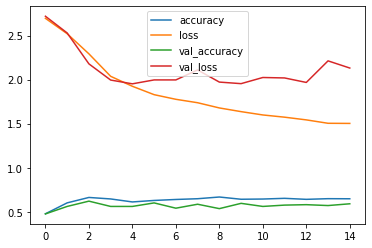

In [ ]:
plt.plot(hist1.history['accuracy'], label='accuracy')
plt.plot(hist1.history['loss'], label='loss')
plt.plot(hist1.history['val_accuracy'], label='val_accuracy')
plt.plot(hist1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

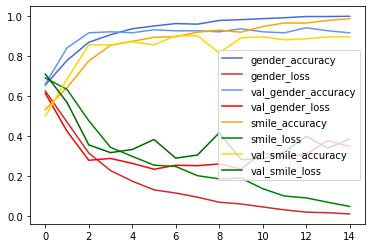

In [ ]:
plt.plot(hist2.history['dense_27_accuracy'], label='gender_accuracy', color='royalblue')
plt.plot(hist2.history['dense_27_loss'], label='gender_loss', color='C3')
plt.plot(hist2.history['val_dense_27_accuracy'], label='val_gender_accuracy', color='cornflowerblue')
plt.plot(hist2.history['val_dense_27_loss'], label='val_gender_loss', color='red')

plt.plot(hist2.history['dense_28_accuracy'], label='smile_accuracy', color='orange')
plt.plot(hist2.history['dense_28_loss'], label='smile_loss', color='green')
plt.plot(hist2.history['val_dense_28_accuracy'], label='val_smile_accuracy', color='gold')
plt.plot(hist2.history['val_dense_28_loss'], label='val_smile_loss', color='darkgreen')

plt.legend()
plt.show()

## Step 7. 결과 확인

### 문제 33. 완성된 모델에서 test_image를 1장 넣고 결과를 res 변수에 저정하세요.

In [ ]:
# 모델에 test_images 중 1장을 넣고 결과를 받는 코드를 작성하세요.

In [ ]:
res = model2.predict(test_images[0:1]) # outputs이 두 개 나옴
print(res, len(res))
print(res[0].shape, res[1].shape)

[array([[0.01152528, 0.9884748 ]], dtype=float32), array([[1.6178825e-06, 9.9999833e-01]], dtype=float32)] 2
(1, 2) (1, 2)


### 문제 34. res와 test_images[1]을 plt로 출력하세요

In [ ]:
# res와 test_images[1]을 print와 plt로 출력하는 코드를 작성하세요.

model

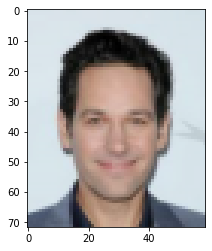

[1 1]


In [ ]:
plt.imshow(test_images[3])
plt.show()

print(test_labels[3])

In [ ]:
res = model.predict(test_images[3:4])
res

array([[1.2695205e-06, 9.9999869e-01, 7.5871940e-03, 9.9241275e-01]],
      dtype=float32)

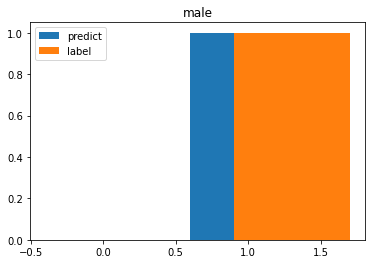

In [ ]:
plt.bar(range(2), res[0][:2], label='predict')
plt.bar(np.array(range(2))+0.3, test_male_labels[0], label='label')
plt.legend()
plt.title('male')
plt.show()

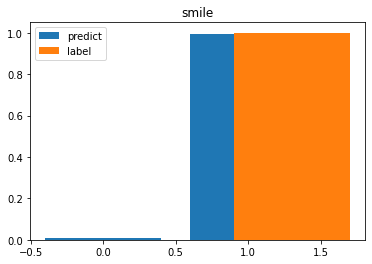

In [ ]:
plt.bar(range(2), res[0][2:], label='predict')
plt.bar(np.array(range(2))+0.3, test_male_labels[0], label='label')
plt.legend()
plt.title('smile')
plt.show()

model2

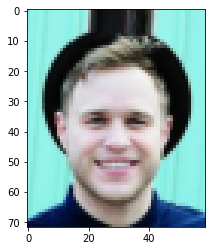

In [ ]:
plt.imshow(test_images[0])
plt.show()

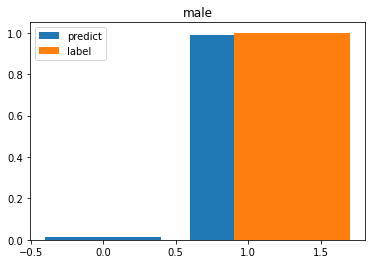

In [ ]:
plt.bar(range(2), res[0][0], label='predict')
plt.bar(np.array(range(2))+0.3, test_male_labels[0], label='label')
plt.legend()
plt.title('male')
plt.show()

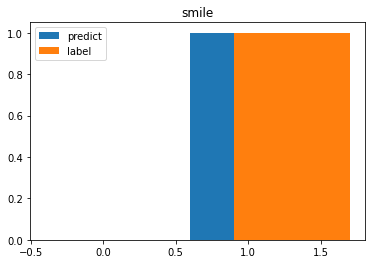

In [ ]:
plt.bar(range(2), res[1][0], label='predict')
plt.bar(np.array(range(2))+0.3, test_smile_labels[0], label='label')
plt.legend()
plt.title('smile')
plt.show()

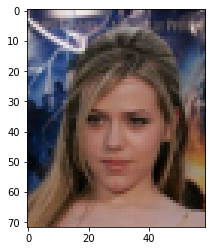

[0 0]


In [ ]:
res = model2.predict(test_images[1:2])

plt.imshow(test_images[1])
plt.show()

print(test_labels[1])

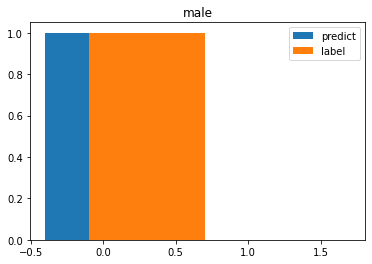

In [ ]:
plt.bar(range(2), res[0][0], label='predict')
plt.bar(np.array(range(2))+0.3, test_male_labels[1], label='label')
plt.legend()
plt.title('male')
plt.show()

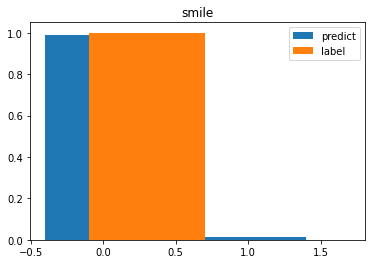

In [ ]:
plt.bar(range(2), res[1][0], label='predict')
plt.bar(np.array(range(2))+0.3, test_smile_labels[1], label='label')
plt.legend()
plt.title('smile')
plt.show()

## Step 8. 모델 분리

###문제 35. model의 뒷단을 수정하여 성별 모델을 분리해보세요.

In [ ]:
# model의 뒷단을 수정하여 성별 모델을 분리하고 모델 정보를 확인하는 코드를 작성하세요.

In [ ]:
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 72, 59, 3)]  0           []                               
                                                                                                  
 conv2d_30 (Conv2D)             (None, 70, 57, 32)   896         ['input_11[0][0]']               
                                                                                                  
 max_pooling2d_30 (MaxPooling2D  (None, 35, 28, 32)  0           ['conv2d_30[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_31 (Conv2D)             (None, 33, 26, 64)   18496       ['max_pooling2d_30[0][0]'] 

In [ ]:
gender_model2 = Model(inputs = model2.input, outputs = model2.get_layer('dense_27').output)
gender_model2.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 72, 59, 3)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 70, 57, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 35, 28, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 33, 26, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 16, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 11, 64)        3692

In [ ]:
gender_model2.get_weights()[0][0][0][0] # gender_model2와 smile_model2의 앞 부분은 같은 weight를 공유함(뒤 쪽은 다름)

array([-0.04863748, -0.04911394, -0.10476077,  0.06551343,  0.16855793,
       -0.11579783,  0.09418778,  0.15595812, -0.04549252, -0.12835097,
       -0.0023206 , -0.00600409,  0.15541595,  0.18771298,  0.12836045,
        0.20149015, -0.12537065,  0.01611782,  0.18435946, -0.0018772 ,
        0.16798006,  0.06473882, -0.04009569, -0.08518829, -0.0838763 ,
        0.12234601,  0.00661798,  0.0328041 ,  0.02761539,  0.01789257,
       -0.06629802,  0.08330103], dtype=float32)

### 문제 36. 성별모델에서 테스트 데이터 확인

In [ ]:
# 성별모델에서 테스트 데이터 확인

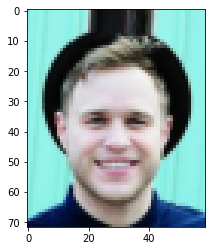

[1 1]


In [ ]:
plt.imshow(test_images[0])
plt.show()

print(test_labels[0])

In [ ]:
x1 = gender_model2.predict(test_images[0:1])
x1.argmax()

1

### 문제 37. 뒷단을 수정하여 smile 모델을 분리해보세요.

In [ ]:
# model의 뒷단을 수정하여 smile 모델을 분리하고 정보를 확인하는 코드를 작성하세요.

In [ ]:
smile_model2 = Model(inputs = model2.input, outputs = model2.get_layer('dense_28').output)
smile_model2.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 72, 59, 3)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 70, 57, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 35, 28, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 33, 26, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 16, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 11, 64)        369

In [ ]:
smile_model2.get_weights()[0][0][0][0]

array([-0.04863748, -0.04911394, -0.10476077,  0.06551343,  0.16855793,
       -0.11579783,  0.09418778,  0.15595812, -0.04549252, -0.12835097,
       -0.0023206 , -0.00600409,  0.15541595,  0.18771298,  0.12836045,
        0.20149015, -0.12537065,  0.01611782,  0.18435946, -0.0018772 ,
        0.16798006,  0.06473882, -0.04009569, -0.08518829, -0.0838763 ,
        0.12234601,  0.00661798,  0.0328041 ,  0.02761539,  0.01789257,
       -0.06629802,  0.08330103], dtype=float32)

### 문제 38. 스마일 모델에서 테스트 데이터 확인

In [ ]:
# 스마일 모델에서 테스트 데이터 확인

In [ ]:
x2 = smile_model2.predict(test_images[0:1])
x2.argmax()

1

## Step 9. 통합 모델 저장 및 로드, 다운

### 문제 39. 모델을 저장하세요.

In [ ]:
# 모델을 저장하는 코드를 작성하세요.

In [ ]:
model2.save('/content/drive/MyDrive/패스트캠퍼스/Part 1/multi_model.h5')

In [ ]:
!ls -al '/content/drive/MyDrive/패스트캠퍼스/Part 1'

total 174282
-rw------- 1 root root 173961605 Feb 14 15:40  celeba_small.npz
drwx------ 2 root root      4096 Feb 15 07:21  .ipynb_checkpoints
-rw------- 1 root root   2462776 Feb 15 13:40  multi_model.h5
-rw------- 1 root root    364345 Feb 14 15:26 '[실습]Part1_Ch01_이미지 분류 - RNN으로 손글씨 이미지 분류하기.ipynb'
-rw------- 1 root root    211657 Feb 14 12:40 'Part1_Ch01_이미지 분류 - RNN으로 손글씨 이미지 분류하기.ipynb'
-rw------- 1 root root    564006 Feb 15 13:40 '[실습]Part1_Ch02_멀티모델 분류 - 인물 사진에서 성별과 표정 분석하기.ipynb'
-rw------- 1 root root    491518 Feb 14 12:40 'Part1_Ch02_멀티모델 분류 - 인물 사진에서 성별과 표정 분석하기.ipynb'
-rw------- 1 root root     19063 Mar 26  2021 '[실습]Part1_Ch03_멀티레이블 분류 - 여러 의상 사진에서 옷 종류 구분하기.ipynb'
-rw------- 1 root root    383661 Feb 14 12:40 'Part1_Ch03_멀티레이블 분류 - 여러 의상 사진에서 옷 종류 구분하기.ipynb'


### 문제 40. 모델 파일을 새로운 모델에 로드하세요.

In [ ]:
# 모델을 로드하는 코드를 작성하세요.

In [ ]:
model3 = tf.keras.models.load_model('/content/drive/MyDrive/패스트캠퍼스/Part 1/multi_model.h5')

In [ ]:
model3.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 72, 59, 3)]  0           []                               
                                                                                                  
 conv2d_30 (Conv2D)             (None, 70, 57, 32)   896         ['input_11[0][0]']               
                                                                                                  
 max_pooling2d_30 (MaxPooling2D  (None, 35, 28, 32)  0           ['conv2d_30[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_31 (Conv2D)             (None, 33, 26, 64)   18496       ['max_pooling2d_30[0][0]'] 

In [ ]:
model3.get_weights()[0][0][0][0]

array([-0.04863748, -0.04911394, -0.10476077,  0.06551343,  0.16855793,
       -0.11579783,  0.09418778,  0.15595812, -0.04549252, -0.12835097,
       -0.0023206 , -0.00600409,  0.15541595,  0.18771298,  0.12836045,
        0.20149015, -0.12537065,  0.01611782,  0.18435946, -0.0018772 ,
        0.16798006,  0.06473882, -0.04009569, -0.08518829, -0.0838763 ,
        0.12234601,  0.00661798,  0.0328041 ,  0.02761539,  0.01789257,
       -0.06629802,  0.08330103], dtype=float32)

### 문제 41. 로드한 모델을 test 데이터로 평가해보세요.


In [ ]:
# 로드한 모델을 test 데이터로 평가해보세요.

In [ ]:
model3.evaluate(test_images, (test_male_labels, test_smile_labels))

7/7 [==============================] - 1s 9ms/step - loss: 0.7332 - dense_27_loss: 0.3473 - dense_28_loss: 0.3859 - dense_27_accuracy: 0.9150 - dense_28_accuracy: 0.8950


[0.7332363724708557,
 0.34731319546699524,
 0.38592323660850525,
 0.9150000214576721,
 0.8949999809265137]

### 문제 42. 모델을 내 컴퓨터에 저장해보세요

In [ ]:
# 모델을 내 컴퓨터에 저장해보세요.

In [ ]:
from google.colab import files

files.download('/content/drive/MyDrive/패스트캠퍼스/Part 1/multi_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>